# OS Prediction
In this section we should predict the operating system of cellphones based on data we have. This section has two parts.  The difference between these two parts is on "Battery Capacity" field from dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pprint import pprint
warnings.filterwarnings('ignore')

In [ ]:
X_train = pd.read_csv('./os_train_cleared.csv')
X_val = pd.read_csv('./os_val_cleared.csv')
X_test = pd.read_csv('./os_test_cleared.csv')
y_train = pd.read_csv('./target_train.csv')
y_val = pd.read_csv('./target_val.csv')
y_test = pd.read_csv('./target_test.csv')

In [ ]:
X_train.shape

(1915, 27)

### Creating Models

In this Section we are going to describe some models and train them with our training data. then we will validate it with our validating data. at last, when we find our best model, we will use it to test the model with our test data.

our first model is a simple Decision Tree Classifier. 

In [ ]:
def score_printer(y_train, train_predict, y_val, val_predict):
    print("F1_score of train: ", f1_score(y_true=y_train, y_pred=train_predict, average='weighted'))
    print("F1_score of validation: ", f1_score(y_true=y_val, y_pred=val_predict, average='weighted'))
    print("accuracy_score of train: ", accuracy_score(y_true=y_train, y_pred=train_predict))
    print("accuracy_score of validation: ", accuracy_score(y_true=y_val, y_pred=val_predict))
    print("Precision of train: ", precision_score(y_true=y_train, y_pred=train_predict, average='weighted'))
    print("Precision of validation: ", precision_score(y_true=y_val, y_pred=val_predict, average='weighted'))
    print("Recall of train: ", recall_score(y_true=y_train, y_pred=train_predict, average='weighted'))
    print("Recall of validation: ", recall_score(y_true=y_val, y_pred=val_predict, average='weighted'))

In [ ]:
def heatmap(y_train, train_predict):
    cm = confusion_matrix(y_train,train_predict)

    sns.heatmap(cm , annot=True ,fmt='d')
    plt.xlabel("preficted Labels")
    plt.ylabel("True Lables")

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
train_predict = dtc.predict(X_train)
val_predict = dtc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)


F1_score of train:  1.0
F1_score of validation:  0.9171597633136095
accuracy_score of train:  1.0
accuracy_score of validation:  0.9201183431952663
Precision of train:  1.0
Precision of validation:  0.9153846153846154
Recall of train:  1.0
Recall of validation:  0.9201183431952663


This result shows that our model is overfit! for example, compare confusion matrix of the result of predicted train and validation. it shows that in our train, we have guessed all "IOS" values correctly, but  in validation we guessed all of our "IOS" wrong! 

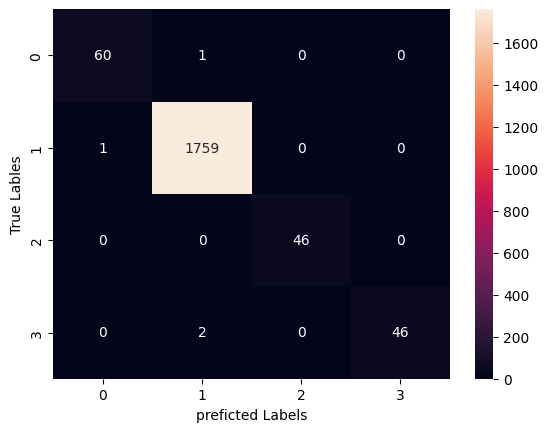

In [ ]:
heatmap(y_train,train_predict)

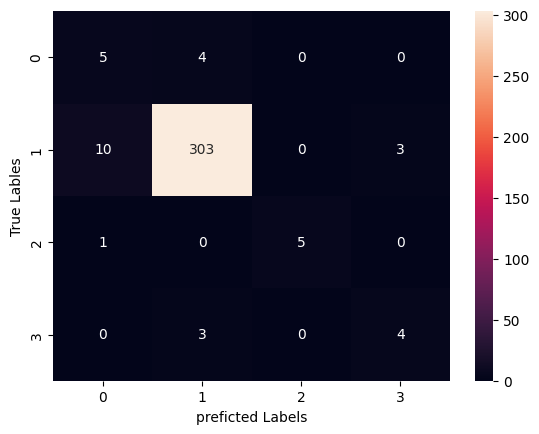

In [ ]:
heatmap(y_val, val_predict)

Now, we try to work on our model. first, we will use a gridSeach to find our model with best hyper-parameters

In [ ]:
tree_param = {'criterion':['gini','entropy', 'log_loss'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30],
              'max_features': ['auto', 'sqrt', 'log2'], 'splitter':['best', 'random']}
dtc_grid_result = GridSearchCV(dtc, tree_param, scoring='f1_weighted',cv=5)
dtc_grid_result.fit(X_train, y_train)
dtc_grid_result.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'splitter': 'random'}

In [ ]:
dtc = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=15, max_features='auto', splitter='random')
dtc.fit(X_train, y_train)
train_predict = dtc.predict(X_train)
val_predict = dtc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9979007097245939
F1_score of validation:  0.9436647893762664
accuracy_score of train:  0.997911227154047
accuracy_score of validation:  0.9378698224852071
Precision of train:  0.997913005337514
Precision of validation:  0.9517071483107463
Recall of train:  0.997911227154047
Recall of validation:  0.9378698224852071


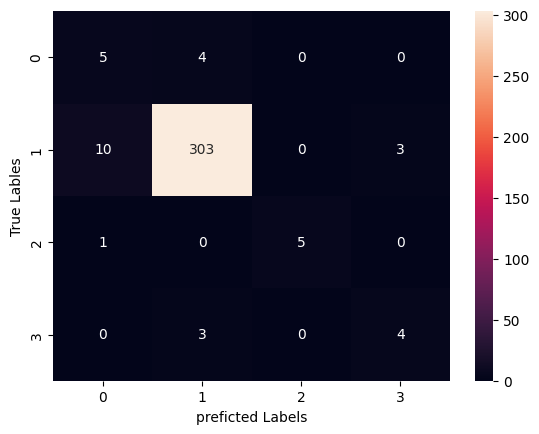

In [ ]:
heatmap(y_val,val_predict)


It seems like with hyper-parameters shown below, we will get the best result. our accuracy_score on validation data is 93% and our f1_score on validation data is 94% and it seems like a good percent. Although, it seems like our prediction on IOS and and Other type of OS we have problems. But on Android and Windows phone our prediction is good

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'splitter': 'random'}

In [ ]:
sgdc = SGDClassifier(random_state=42)
sgdc.fit(X_train, y_train)
train_predict = sgdc.predict(X_train)
val_predict = sgdc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9221374779067087
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9289940828402367
Precision of train:  0.9503345335176827
Precision of validation:  0.9279439696106362
Recall of train:  0.9524804177545692
Recall of validation:  0.9289940828402367


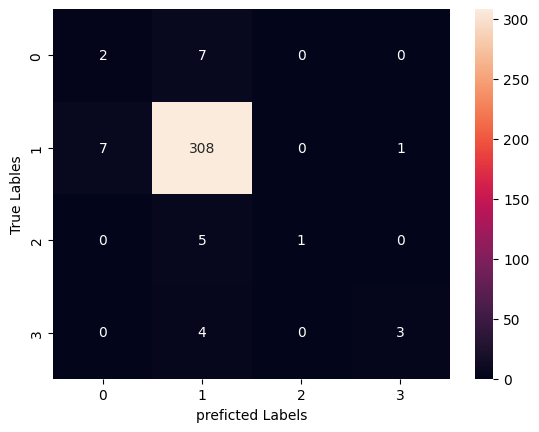

In [ ]:
heatmap(y_val, val_predict)

In [37]:
sgdc = SGDClassifier(random_state=42)
sgdc.fit(X_train, y_train)
train_predict = sgdc.predict(X_train)
val_predict = sgdc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9221374779067087
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9289940828402367
Precision of train:  0.9503345335176827
Precision of validation:  0.9279439696106362
Recall of train:  0.9524804177545692
Recall of validation:  0.9289940828402367


In [42]:
tree_param = {'loss':['hinge', 'perceptron', 'squared_error','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'penalty':['l2', 'l1', 'elasticnet'], 'l1_ratio':[0.001, 0.01, 0.15], 'alpha':[0.0001, 0.001, 0.01]}
sgdc_grid_result = GridSearchCV(sgdc, tree_param, scoring='f1_weighted',cv=5)
sgdc_grid_result.fit(X_train, y_train)
sgdc_grid_result.best_params_

{'l1_ratio': 0.001, 'loss': 'hinge', 'penalty': 'l1'}

In [44]:
sgdc = SGDClassifier(random_state=42, l1_ratio=0.001, loss='hinge', penalty='l1')
sgdc.fit(X_train, y_train)
val_predict = sgdc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9396024024431051
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9408284023668639
Precision of train:  0.9503345335176827
Precision of validation:  0.9409721578156591
Recall of train:  0.9524804177545692
Recall of validation:  0.9408284023668639


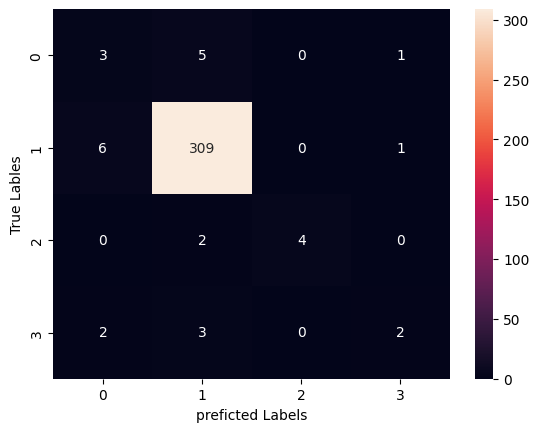

In [45]:
heatmap(y_val,val_predict)


It seems like 'SGDClassifier' does not bring us better scores. IOS and other still does not predict properly. 